In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [131]:
transaction = pd.read_excel('/Users/alenjose/Desktop/data/kpmg_internship/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions')
newCustomer = pd.read_excel('/Users/alenjose/Desktop/data/kpmg_internship/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList')
demographic = pd.read_excel('/Users/alenjose/Desktop/data/kpmg_internship/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic')
Address = pd.read_excel('/Users/alenjose/Desktop/data/kpmg_internship/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress')

In [4]:
transaction.head(3)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701


In [5]:
def define_df(df):
    column_names = [i for i in df.iloc[0]]
    df.columns = column_names
    df = df.iloc[1:]
    print(column_names)
    return df

In [6]:
transaction = define_df(transaction)

['transaction_id', 'product_id', 'customer_id', 'transaction_date', 'online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'standard_cost', 'product_first_sold_date']


In [7]:
transaction

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [8]:
transaction.iloc[1:]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
6,6,25,2339,2017-03-08 00:00:00,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [9]:
transaction = transaction.set_index('transaction_id')
transaction.head()

/Users/alenjose/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [10]:
transaction.describe()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [11]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   product_id               20000 non-null  object
 1   customer_id              20000 non-null  object
 2   transaction_date         20000 non-null  object
 3   online_order             19640 non-null  object
 4   order_status             20000 non-null  object
 5   brand                    19803 non-null  object
 6   product_line             19803 non-null  object
 7   product_class            19803 non-null  object
 8   product_size             19803 non-null  object
 9   list_price               20000 non-null  object
 10  standard_cost            19803 non-null  object
 11  product_first_sold_date  19803 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [44]:
transaction.duplicated().sum()

0

## Accuracy : 

1) Data Validation : 

In [12]:
transaction.product_id.nunique()

101

In [13]:
transaction.customer_id.nunique()

3494

In [14]:
transaction.transaction_date.min()

datetime.datetime(2017, 1, 1, 0, 0)

In [15]:
transaction.transaction_date.max()

datetime.datetime(2017, 12, 30, 0, 0)

In [16]:
transaction.online_order.value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

In [17]:
transaction.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [18]:
transaction.brand.value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [19]:
transaction.product_line.value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [20]:
transaction.product_class.value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [21]:
transaction.product_size.value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [22]:
transaction.standard_cost.sort_values(ascending=False)

transaction_id
756      1759.85
16509    1759.85
10082    1759.85
19552    1759.85
10182    1759.85
          ...   
19341        NaN
19384        NaN
19794        NaN
19860        NaN
19872        NaN
Name: standard_cost, Length: 20000, dtype: object

In [23]:
num_empty_columns = 3  

mask = transaction.isna().sum(axis=1) >= num_empty_columns
rows_with_empty_columns = transaction[mask]
len(rows_with_empty_columns)

197

In [24]:
transaction.product_first_sold_date

transaction_id
1        41245
2        41701
3        36361
4        36145
5        42226
         ...  
19996    37823
19997    35560
19998    40410
19999    38216
20000    36334
Name: product_first_sold_date, Length: 20000, dtype: object

In [25]:
transaction['product_first_sold_date'] = \
pd.to_numeric(transaction['product_first_sold_date'], errors='coerce')

In [26]:
pd.to_datetime(transaction['product_first_sold_date'], origin='1899-12-30', unit='D').sort_values()

transaction_id
13883   1991-01-21
13412   1991-01-21
1549    1991-01-21
11495   1991-01-21
10037   1991-01-21
           ...    
19341          NaT
19384          NaT
19794          NaT
19860          NaT
19872          NaT
Name: product_first_sold_date, Length: 20000, dtype: datetime64[ns]

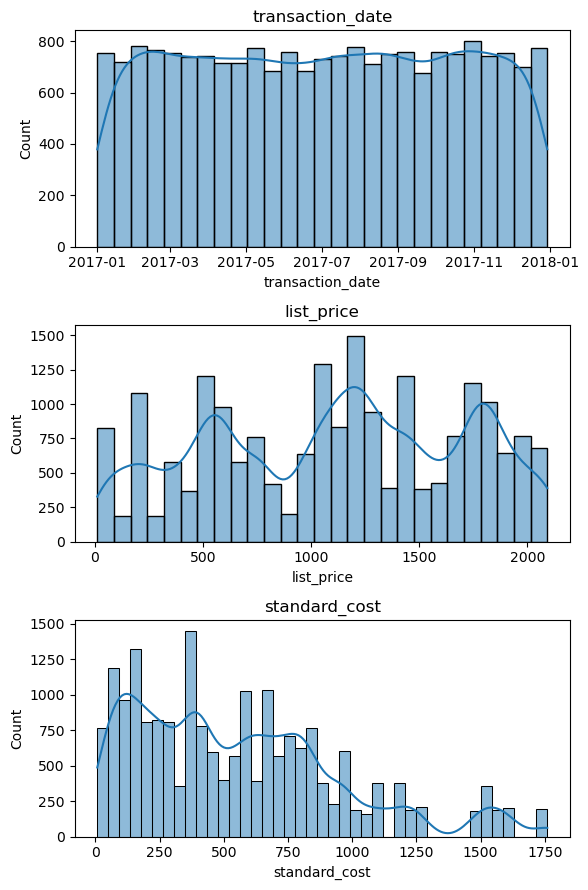

In [32]:
columns_to_check = ['transaction_date','list_price','standard_cost']

fig, axes = plt.subplots(len(columns_to_check), 1, figsize=(6, 3 * len(columns_to_check)))

for i, column in enumerate(columns_to_check):
    sns.histplot(transaction[column].dropna(), ax=axes[i], kde=True)
    axes[i].set_title(column)

plt.tight_layout()

plt.show()


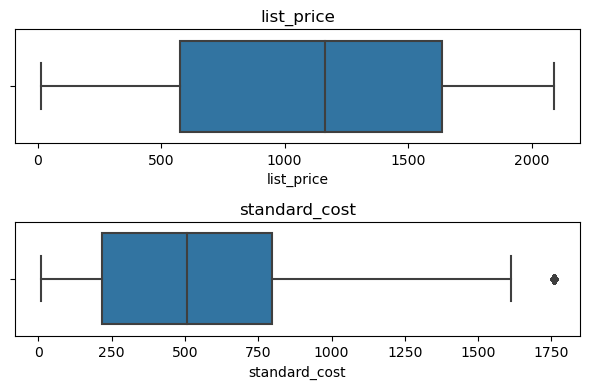

In [28]:
columns_to_check = ['list_price','standard_cost']

fig, axes = plt.subplots(len(columns_to_check), 1, figsize=(6, 2 * len(columns_to_check)))

for i, column in enumerate(columns_to_check):
    sns.boxplot(x=transaction[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()


plt.show()


In [29]:
newCustomer.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.703125


In [30]:
newCustomer = define_df(newCustomer)

['first_name', 'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode', 'state', 'country', 'property_valuation', nan, nan, nan, nan, nan, 'Rank', 'Value']


In [40]:
newCustomer.index.rename('customer_id',inplace=True)

In [55]:
newCustomer.head(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
customer_id,,,,,,,,,,,,,,,,,,,,,,,
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.56,0.70,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.89,0.89,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.01,1.01,1.0100,1.010000,1.0,1,1.71875


In [43]:
newCustomer.duplicated().sum()

0

In [45]:
newCustomer.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

The female, male proportion is ok but found another value U that is not defined.

In [54]:
print('past_3_years_bike_related_purchases')
print('------------------------------------- ')
print('min:',newCustomer.past_3_years_bike_related_purchases.min())
print('max:',newCustomer.past_3_years_bike_related_purchases.max())

past_3_years_bike_related_purchases
------------------------------------- 
min: 0
max: 99


In [84]:
def convert_to_datetime(x):
    if isinstance(x, pd.Timestamp):
        return x
    else:
        return pd.to_datetime(x)
    

newCustomer['DOB'] = newCustomer['DOB'].apply(lambda x: convert_to_datetime(x))

In [87]:
newCustomer['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [88]:
newCustomer['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [89]:
newCustomer['deceased_indicator'].value_counts() 

N    1000
Name: deceased_indicator, dtype: int64

In [90]:
newCustomer['owns_car'].value_counts() 

No     507
Yes    493
Name: owns_car, dtype: int64

In [94]:
newCustomer['tenure'].value_counts() 

9     79
13    74
11    68
10    63
12    61
5     60
7     60
17    59
15    58
8     55
14    54
16    49
6     45
4     36
18    36
19    34
3     26
21    24
20    22
2     15
22    12
1      8
0      2
Name: tenure, dtype: int64

In [96]:
newCustomer['state'].value_counts() 

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [97]:
newCustomer['country'].value_counts() 

Australia    1000
Name: country, dtype: int64

In [98]:
newCustomer['property_valuation'].value_counts() 

9     173
8     161
7     136
10    116
6      69
11     61
5      57
4      53
3      51
12     46
2      42
1      30
7       2
11      1
8       1
6       1
Name: property_valuation, dtype: int64

In [100]:
newCustomer['Rank'].value_counts() 

760     13
259     12
455      9
133      9
386      9
        ..
240      1
248      1
657      1
249      1
1000     1
Name: Rank, Length: 324, dtype: int64

In [101]:
newCustomer['Value']

customer_id
1        1.71875
2        1.71875
3        1.71875
4       1.703125
5       1.703125
          ...   
996        0.374
997        0.357
998        0.357
999        0.357
1000        0.34
Name: Value, Length: 1000, dtype: object

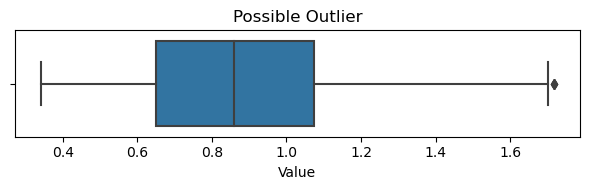

In [112]:

fig, axes = plt.subplots(1, 1, figsize=(6, 2))


sns.boxplot(x=newCustomer['Value'], ax=axes)
axes.set_title('Possible Outlier')

plt.tight_layout()


plt.show()


## Demographics : 

In [132]:
demographic = define_df(demographic)

['customer_id', 'first_name', 'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'default', 'owns_car', 'tenure']


In [148]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           4000 non-null   object
 1   last_name                            3875 non-null   object
 2   gender                               4000 non-null   object
 3   past_3_years_bike_related_purchases  4000 non-null   object
 4   DOB                                  3913 non-null   object
 5   job_title                            3494 non-null   object
 6   job_industry_category                3344 non-null   object
 7   wealth_segment                       4000 non-null   object
 8   deceased_indicator                   4000 non-null   object
 9   default                              3698 non-null   object
 10  owns_car                             4000 non-null   object
 11  tenure                               3913 n

In [133]:
demographic = demographic.set_index('customer_id')
demographic.head()

/Users/alenjose/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [189]:
demographic.reset_index().customer_id.nunique()

4000

In [134]:
demographic.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [136]:
to_rep = dict(zip(['F', 'M', 'Femal'],['Female', 'Male', "Female"]))
demographic.replace({'gender':to_rep},inplace=True)
demographic['gender'].value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

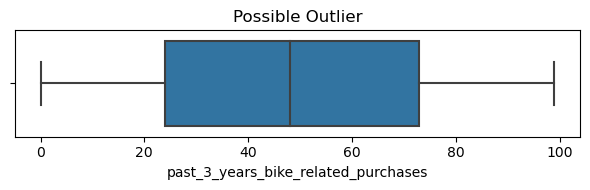

In [138]:
fig, axes = plt.subplots(1, 1, figsize=(6, 2))


sns.boxplot(x=demographic['past_3_years_bike_related_purchases'], ax=axes)
axes.set_title('Possible Outlier')

plt.tight_layout()


plt.show()

In [167]:
demographic.DOB = pd.to_datetime(demographic.DOB)

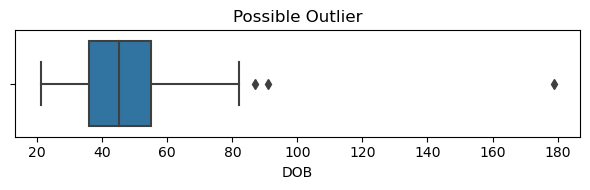

In [169]:
import pandas as pd
from datetime import datetime

def calculate_age(date):
    today = datetime.today()  # Corrected to access today's date using datetime.today()
    

    if pd.isnull(date):
        return None
    try:
        return today.year - date.year - ((today.month, today.day) < (date.month, date.day))

    except ValueError:
        return None
    
fig, axes = plt.subplots(1, 1, figsize=(6, 2))


sns.boxplot(x=demographic['DOB'].apply(calculate_age), ax=axes)
axes.set_title('Possible Outlier')

plt.tight_layout()


plt.show()




In [171]:
demographic[demographic['DOB'].apply(calculate_age) > 100]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20


In [172]:
demographic.default.value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

In [173]:
demographic.owns_car.value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [177]:
Address = define_df(Address)

['customer_id', 'address', 'postcode', 'state', 'country', 'property_valuation']


In [179]:
Address = Address.set_index('customer_id')

Address.head(3)

/Users/alenjose/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9


In [187]:
Address.reset_index().customer_id.nunique()

3999

In [190]:
Address.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

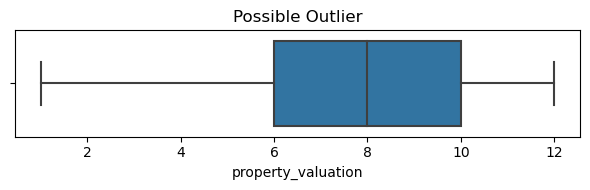

In [193]:
fig, axes = plt.subplots(1, 1, figsize=(6, 2))


sns.boxplot(x=Address['property_valuation'], ax=axes)
axes.set_title('Possible Outlier')

plt.tight_layout()


plt.show()